In [6]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as pl

In [36]:
def ryOptimization(
        f, 
        c1, 
        c2, 
        xyBounds):

    x,y= sm.symbols('x,y')

    # sympy function --> numpy function
    z= sm.lambdify([x,y],f([x,y])) 

    xx= np.linspace(-10,10,1001)
    yy= np.linspace(-10,10,1001)
    zz= z(xx,yy)

    xm, ym= np.meshgrid(xx,yy)
    zm= z(xm,ym)
    zz.shape, zm.shape

    y1= sm.solve(
            c1([x,y]),
            y)[0]
    y2= sm.solve(
            c2([x,y]),
            y)[0]
    y1= sm.lambdify(x, y1)
    y2= sm.lambdify(x, y2)
    yy1= y1(xx)
    yy2= y2(xx)
    [(xmin,xmax),(ymin,ymax)]= xyBounds
            
    y_ymin= ymin *np.ones_like(xx)
    y_ymax= ymax *np.ones_like(xx)
    x_xmin= xmin *np.ones_like(yy)
    x_xmax= xmax *np.ones_like(yy)

    y_0= np.zeros_like(xx)
    x_0= np.zeros_like(yy)

    ax= pl.axes(xlim=(-10,10),ylim=(-10,10))#, projection='3d')

    ax.contour(xm,ym,zm, 100, cmap='rainbow')

    ax.plot(xx,yy1,'r',
            xx,yy2,'g',
            linestyle='--'
        )    

    ax.plot(xx, y_0,'w-',
            x_0,yy, 'w-',
            linewidth= 3,
            alpha= 0.3 
        )

    ax.plot(xx,     y_ymin,
            xx,     y_ymax,
            x_xmin, yy, 
            x_xmax, yy, 
            linewidth= 1,
            linestyle= '--',
            color= 'gray'
        )

    for yyy in [yy1,yy2]:
        
        ax.fill_between(xx, y_ymax, yyy,                 
                        where= (yyy>=y_ymax),
                        alpha= 0.5, 
                        color='white', 
                        interpolate=True
                    )
        ax.fill_between(xx, y_ymin, yyy,                 
                        where= (yyy<=y_ymin),
                        alpha= 0.5, 
                        color='white', 
                        interpolate=True
                    )


    import scipy.optimize as sopt

    x0= [0, 0]

    opt= sopt.minimize(
        f,
        x0,
        #method= 'SLSQP',
        bounds= xyBounds,
        constraints=     Constraints
    )

    opt

    xopt= opt.x[0]
    yopt= opt.x[1]
    fopt= opt.fun

    ax.scatter(
        x= xopt,
        y= yopt, 
        color= 'magenta',
        marker= 's'    
    )

    ax.text(
        x= xopt, 
        y= yopt,
        s= f'{xopt:.3f},{yopt:.3f}'
    )


    fLtx=  sm.latex(f([x,y]))
    c1Ltx= sm.latex(c1([x,y]))
    c2Ltx= sm.latex(c2([x,y]))

    titleStr= f'''
    Optimize:      f(x,y)= ${fLtx}$
    Subject to:    Constraints and Bounds
    opt= [x= {xopt:.3f}, y= {yopt:.3f}; f= {fopt:.3f}]
    '''

    ax.set_title(titleStr)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    infoStr= f'''
    $Objective: f(x,y)= {fLtx}$
    $c_1(x,y)= {c1Ltx} ≥ 0$ 
    $c_2(x,y)= {c2Ltx} ≥ 0$ 
    $x \in [{xmin},{xmax}]$ 
    $y \in [{ymin},{ymax}]$
    opt= [x= {xopt:.3f}, y= {yopt:.3f}; f= {fopt:.3f}]
    '''
    ax.text(
        x= -10, 
        y= -10,
        s= infoStr
    )

    pl.show()

In [37]:
def f(s):
    x, y= s
    z=  x + y
    
    return z
def c1(s):
    x,y= s
    z= x**2 + y**2 -1
    return z

def c2(s):
    x,y= s
    z= -(x**2 + y**2 -2)
    return z

Constraints= [
    {'fun':c1, 'type':'ineq'},
    {'fun':c2, 'type':'ineq'},
]

xyBounds= [(-5, 5),  # xmin, xmax
           (-5, 5)   # ymin, ymax
           ]

<lambdifygenerated-40>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(1 - x**2)
<lambdifygenerated-41>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(2 - x**2)


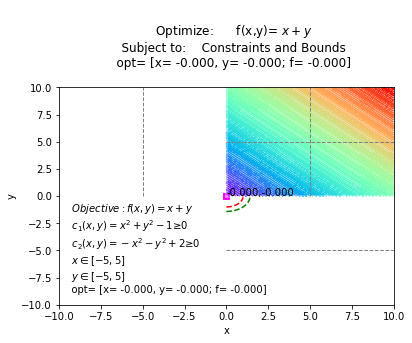

In [38]:
ryOptimization(f,c1,c2, xyBounds)